In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Подготовка данных

Вычитываем табличку:

In [2]:
raw_db = pd.read_csv("data/dump2.csv")

Смотрим на её размеры:

In [3]:
print(raw_db.shape)
raw_db.head()

(34433, 60)


,id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,...,electrical_entries_count,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type
0,8649748,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,1.0,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,"0,00",Центральное,Вытяжная вентиляция,Отсутствует,Внутренние водостоки
1,9370109,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено
2,8963246,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,7.0,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,NaN,Отсутствует,Приточно-вытяжная вентиляция,Пожарные гидранты,Внутренние водостоки
3,8932138,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено
4,8932139,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,NaN,г,Москва,NaN,NaN,NaN,...,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено


Смотрим, сколько в каждом столбце пропусков (от 0 до 34433):

In [4]:
raw_db.isnull().sum(axis = 0)

id                                     0
region_id                              0
area_id                            33151
city_id                            31900
street_id                           1125
shortname_region                       0
formalname_region                      0
shortname_area                     33151
formalname_area                    33151
shortname_city                     31900
formalname_city                    31900
shortname_street                    1125
formalname_street                   1125
house_number                         470
building                           32706
block                              18326
letter                             34417
address                                0
houseguid                              0
management_organization_id          1093
built_year                          1499
exploitation_start_year              369
project_type                         421
house_type                             0
is_alarm        

Выбираем столбцы, которые могут быть полезны:

In [5]:
useful_columns = [
    "id", 
    "houseguid",
    "region_id",
    "shortname_region",
    "formalname_region",
    "address",
    "house_number",
    "building",
    "block",
    "letter",
    "floor_count_max",
    "floor_count_min",
    "entrance_count",
    "elevators_count",
    "quarters_count",
    "living_quarters_count",
    "unliving_quarters_count" 
]

In [6]:
db = raw_db[useful_columns]

In [7]:
print(db.shape)
db.head(5)

(34433, 17)


,id,houseguid,region_id,shortname_region,formalname_region,address,house_number,building,block,letter,floor_count_max,floor_count_min,entrance_count,elevators_count,quarters_count,living_quarters_count,unliving_quarters_count
0,8649748,521474b9-1d5a-702f-3b75-33ff10263733,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 9, к. 1",9,NaN,1,NaN,9.0,9.0,4.0,4.0,144,144.0,0.0
1,9370109,64f12da8-00f6-ab7c-a849-2e1c3cccd26b,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 14, к. 1",14,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,8963246,4b9cbbad-b371-6ce1-bebe-09e785d0b894,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 42, к. 2",42,NaN,2,NaN,17.0,17.0,7.0,14.0,476,474.0,2.0
3,8932138,c6307da6-86f4-e8ca-50f9-b7a812a258f9,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 2301",2301,NaN,NaN,NaN,13.0,NaN,6.0,9.0,0,NaN,NaN
4,8932139,460591fb-89e3-230c-1691-7478c03eeb36,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 2302",2302,NaN,NaN,NaN,11.0,9.0,3.0,6.0,0,NaN,NaN


## Смотрим, какие слова, сокращения используются в адресах:

In [8]:
from collections import Counter
from nltk.tokenize import WhitespaceTokenizer

In [9]:
c = Counter()
tokenizer = WhitespaceTokenizer()

for adr in db["address"]:
    c.update(tokenizer.tokenize("".join([z for z in adr if z.isalpha() or z == " "])))

In [10]:
c["сооруж"]

13

In [11]:
c.most_common(50)

[('г', 35550),
 ('Москва', 34432),
 ('д', 34130),
 ('ул', 22970),
 ('к', 16116),
 ('п', 2690),
 ('проезд', 2228),
 ('пер', 1959),
 ('я', 1910),
 ('пркт', 1876),
 ('ш', 1744),
 ('стр', 1728),
 ('бр', 1523),
 ('Б', 1205),
 ('й', 1011),
 ('А', 858),
 ('Зеленоград', 583),
 ('Маршала', 579),
 ('Парковая', 506),
 ('Академика', 418),
 ('М', 369),
 ('Московский', 324),
 ('а', 303),
 ('наб', 287),
 ('Вал', 276),
 ('Генерала', 250),
 ('Сосенское', 234),
 ('Первомайское', 217),
 ('мкр', 214),
 ('Коммунарка', 201),
 ('Волгоградский', 195),
 ('Троицк', 191),
 ('Щербинка', 191),
 ('Профсоюзная', 190),
 ('аллея', 182),
 ('Дмитровское', 177),
 ('Первомайская', 175),
 ('Внуковское', 170),
 ('Владимирская', 169),
 ('Десеновское', 169),
 ('Открытое', 165),
 ('Ленинский', 164),
 ('Варшавское', 159),
 ('линия', 149),
 ('Северная', 149),
 ('Юных', 144),
 ('Ленинцев', 144),
 ('Мосрентген', 140),
 ('Октября', 135),
 ('Каширское', 134)]

In [12]:
db["address"].sample(5)

11618                г. Москва, ш. Каширское, д. 58, к. 1
14273                 г. Москва, проезд. Лазоревый, д. 16
620      г. Москва, ул. Академика Арцимовича, д. 12, к. 2
23243               г. Москва, ул. Плеханова, д. 18, к. 2
29768           г. Москва, г. Троицк, пер. Парковый, д. 2
Name: address, dtype: object

# Оставляем дома только из окрестностей садового

## Подход 1. По названиям улиц

Список улиц и площадей берём из [вики](https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D0%B4%D0%BE%D0%B2%D0%BE%D0%B5_%D0%BA%D0%BE%D0%BB%D1%8C%D1%86%D0%BE). Оставляем только те дома из базы, которые находятся на этих улицах.

In [13]:
garden_streets = []
with open("wiki_garden_ring_streets.txt", "r") as file:
    for line in file.readlines():
        garden_streets.append(line.strip())
        
print(len(garden_streets))
print(garden_streets[:5])

36
['Триумфальная площадь', 'Садовая-Триумфальная улица', 'Садовая-Каретная улица', 'Садовая-Самотёчная улица', 'Самотёчная площадь']


Убираем знаки препинания, сокращаем слова *площадь, улица, бульвар*.

In [14]:
garden_streets = [x.lower().strip() for x in garden_streets if len(x)]
garden_streets = ["".join([z for z in x if z.isalpha() or z == " "])  for x in garden_streets]

In [15]:
streets = [(x.replace("улица", "").strip(), "ул") for x in garden_streets if "улица" in x]
squares = [(x.replace("площадь", "").strip(), "пл") for x in garden_streets if "площадь" in x]
boulevards = [(x.replace("бульвар", "").strip(), "бр") for x in garden_streets if "бульвар" in x]

named_entities =  streets + squares + boulevards
lookup_addresses = [x[1] + " " + x[0] for x in named_entities]
names = [x[0] for x in named_entities]

In [16]:
len(garden_streets), len(streets), len(squares), len(boulevards)

(36, 15, 18, 3)

На садовом расположены:

- 15 улиц
- 18 площадей
- 3 бульвара

Итого 36 наименований.

Проверим, сколько в базе домов, которые находятся на улицах с такими названиями.

In [17]:
import re

In [18]:
import warnings
warnings.filterwarnings('ignore')

Делаем несложный парсер адресов (улица, дом, строение, корпус)

In [19]:
prefixes = ["д", "к", "стр", "сооруж"]

In [20]:
s = "г. Москва, б-р   Хорошевский 1-й, д. 6 к. 15 стр. 144А"
def parse_address(s, prefixes=["д", "к", "стр", "сооруж"]):
    x = s.lower()
    x = re.sub(r"[\.\,\-]", "", x)
    x = re.sub(r"г москва", "", x)

    entities = {}
    for prefix in prefixes:
        pattern = re.compile(prefix + " " + "(\d*\w*/?\d*\w*)")
        finds = re.findall(pattern, x)
        if len(finds):
            entity = re.findall(pattern, x)[0]
            entities[prefix] = entity
            x = re.sub(prefix + " " + entity, "", x)
        x = re.sub(r"\W+", " ", x)

    return x.strip(), entities

def match_address(s, addresses):
    pattern = "(" + "|".join(addresses) + ")"
    return ",".join(re.findall(pattern, s))

parse_address(s)

('бр хорошевский 1й', {'д': '6', 'к': '15', 'стр': '144а'})

In [21]:
garden_ring_db = db[db["address"].apply(lambda x: len(match_address(parse_address(x)[0], lookup_addresses)) > 0)]

In [22]:
garden_ring_db.shape

(153, 17)

**153 жилых дома на Садовом кольце**

In [23]:
garden_ring_db.loc[:, "street"] = garden_ring_db.loc[:, "address"].apply(lambda x: match_address(parse_address(x)[0], lookup_addresses))

In [24]:
garden_ring_db.head(3)

,id,houseguid,region_id,shortname_region,formalname_region,address,house_number,building,block,letter,floor_count_max,floor_count_min,entrance_count,elevators_count,quarters_count,living_quarters_count,unliving_quarters_count,street
3974,8125343,3577d957-0028-4978-be64-2bca13a3a0c4,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, ул. Валовая, д. 2-4/44, стр. 1",2-4/44,1,NaN,NaN,8.0,0.0,4.0,4.0,77,60.0,17.0,ул валовая
3975,8125187,8d126ef4-1adc-4eca-8f7b-5c47715e3b09,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, ул. Валовая, д. 6",6,NaN,NaN,NaN,15.0,0.0,4.0,4.0,107,107.0,0.0,ул валовая
3976,8125192,b7322145-677d-4439-9ca9-713b7fc98b9e,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, ул. Валовая, д. 8/18",8/18,NaN,NaN,NaN,11.0,0.0,6.0,12.0,242,219.0,23.0,ул валовая


## Соберём статистику по этим домам (с разбивкой на название улицы и без)

In [25]:
garden_ring_db.groupby("street", as_index=False).agg(
    {
         "address": ["count"],
         "living_quarters_count":["mean",  "sum"],
         "quarters_count" : ["sum"],
         "entrance_count": ["mean",  "sum"],
         "floor_count_min": ["min", "mean", "max"],
         "floor_count_max": ["min", "mean", "max"],
    })

street address living_quarters_count          \
                              count                  mean     sum   
0              бр зубовский       8             53.142857   372.0   
1              бр новинский      20             57.400000  1148.0   
2             бр смоленский      14             84.500000  1014.0   
3              пл калужская       1            323.000000   323.0   
4             пл кудринская       1            449.000000   449.0   
5             пл смоленская       1            192.000000   192.0   
6       пл смоленскаясенная       4             60.000000   240.0   
7                ул валовая      10             76.666667   690.0   
8                 ул житная       1            126.000000   126.0   
9          ул зацепский вал       4             68.500000   274.0   
10          ул земляной вал      38             64.026316  2433.0   
11          ул крымский вал       4             71.333333   214.0   
12       ул садоваякаретная       9             24.222222   218.0   
13     ул садоваякудринская      15             17.733333   266.0   
14       ул садоваяспасская       8            153.142857  1072.0   
15    ул садоваясухаревская       2            133.000000   133.0   
16   ул садоваятриумфальная       8             30.333333   182.0   
17  ул садоваячерногрязская       5            120.000000   600.0   

   quarters_count entrance_count        floor_count_min                   \
              sum           mean    sum             min       mean   max   
0             401       3.500000   28.0             4.0   5.857143   7.0   
1            1219       2.700000   54.0             4.0   6.650000  14.0   
2            1194       3.071429   43.0             5.0   7.000000  17.0   
3             325       8.000000    8.0             1.0   1.000000   1.0   
4             473      15.000000   15.0             8.0   8.000000   8.0   
5             198       7.000000    7.0            10.0  10.000000  10.0   
6             254       2.750000   11.0             4.0   7.250000  11.0   
7             716       3.400000   34.0             0.0   5.000000  13.0   
8             128       6.000000    6.0             1.0   1.000000   1.0   
9             295       2.000000    8.0             0.0   2.250000   9.0   
10           2675       3.605263  137.0             0.0   5.631579  12.0   
11            253       3.750000   15.0             1.0   1.000000   1.0   
12            225       2.444444   22.0             3.0   4.222222   8.0   
13            300       2.466667   37.0             0.0   1.400000   8.0   
14           1175       3.250000   26.0             3.0   9.142857  14.0   
15            259       6.500000   13.0             8.0   8.000000   8.0   
16            377       1.875000   15.0             3.0   4.833333   8.0   
17            533       6.600000   33.0             1.0   5.600000   8.0   

   floor_count_max                   
               min       mean   max  
0              4.0   5.875000   8.0  
1              4.0   6.650000  14.0  
2              5.0   7.071429  17.0  
3             14.0  14.000000  14.0  
4             31.0  31.000000  31.0  
5             10.0  10.000000  10.0  
6              4.0   7.250000  11.0  
7              5.0   9.300000  15.0  
8              7.0   7.000000   7.0  
9              6.0   8.250000   9.0  
10             2.0   7.052632  12.0  
11             8.0   8.250000   9.0  
12             3.0   4.222222   8.0  
13             3.0   6.000000   8.0  
14             3.0  10.500000  26.0  
15             7.0   7.500000   8.0  
16             3.0   7.875000  17.0  
17             5.0   8.200000  11.0

In [26]:
for_stats = garden_ring_db
for_stats.loc[:, "groupby"] = "total"
for_stats.groupby("groupby").agg(
    {
         "address": ["count"],
         "living_quarters_count":["mean",  "sum"],
         "quarters_count" : ["sum"],
         "entrance_count": ["mean",  "sum"],
         "floor_count_min": ["min", "mean", "max"],
         "floor_count_max": ["min", "mean", "max"],
    })

address living_quarters_count         quarters_count entrance_count  \
          count                  mean     sum            sum           mean   
groupby                                                                       
total       153             69.069444  9946.0          11000       3.346405   

               floor_count_min                 floor_count_max                  
           sum             min      mean   max             min      mean   max  
groupby                                                                         
total    512.0             0.0  5.319444  17.0             2.0  7.372549  31.0

## Подход 2. По координатам

In [27]:
import json
from itertools import chain

Читаем табличку с координатами домов:

In [28]:
coords_db = pd.read_csv("moscow_coords.csv", usecols=["ADDRESS", "geoData"], dtype=str)

In [29]:
coords_db.head()

,ADDRESS,geoData
0,"город Москва, Варшавское шоссе, дом 150, строе...","{ ""coordinates"" : [ [ [ 37.6013796035561 , 55...."
1,"город Москва, Косинская улица, дом 26А","{ ""coordinates"" : [ [ [ 37.8279504545784 , 55...."
2,"город Москва, Гороховский переулок, дом 21","{ ""coordinates"" : [ [ [ 37.6682995208392 , 55...."
3,"город Москва, Тагильская улица, дом 4, строени...","{ ""coordinates"" : [ [ [ 37.7527975561661 , 55...."
4,"город Москва, Ленинградский проспект, дом 73А,...","{ ""coordinates"" : [ [ [ 37.5136462392231 , 55...."


In [30]:
def parse_coordinate(str_dct):
    if not isinstance(str_dct, str) or str_dct == "Значение превышает максимальный размер ячейки Excel.":
        return np.zeros(2)
    
    d = json.loads(str(str_dct))
    c = d["coordinates"]
    c = list(chain.from_iterable(c))
    if isinstance(c, list) and len(c) > 1:
        e = np.concatenate([np.array(r).reshape((-1, 2)) for r in c])
    else:
        e = np.array(c)
    return np.array(e).mean(axis=0)


coords_db["coor_x"] = coords_db["geoData"].apply(lambda x: parse_coordinate(x)[0])
coords_db["coor_y"] = coords_db["geoData"].apply(lambda x: parse_coordinate(x)[1])

In [31]:
coords_db

,ADDRESS,geoData,coor_x,coor_y
0,"город Москва, Варшавское шоссе, дом 150, строе...","{ ""coordinates"" : [ [ [ 37.6013796035561 , 55....",37.601252,55.599249
1,"город Москва, Косинская улица, дом 26А","{ ""coordinates"" : [ [ [ 37.8279504545784 , 55....",37.828115,55.717493
2,"город Москва, Гороховский переулок, дом 21","{ ""coordinates"" : [ [ [ 37.6682995208392 , 55....",37.668093,55.766224
3,"город Москва, Тагильская улица, дом 4, строени...","{ ""coordinates"" : [ [ [ 37.7527975561661 , 55....",37.752887,55.818257
4,"город Москва, Ленинградский проспект, дом 73А,...","{ ""coordinates"" : [ [ [ 37.5136462392231 , 55....",37.513546,55.803510
...,...,...,...,...
406929,"город Москва, внутригородская территория посел...","{ ""coordinates"" : [ [ [ 37.3876600958591 , 55....",37.387571,55.387876
406930,"город Москва, внутригородская территория посел...","{ ""coordinates"" : [ [ [ 37.3721416501139 , 55....",37.372039,55.382608
406931,"город Москва, внутригородская территория муниц...","{ ""coordinates"" : [ [ [ 37.8243751207729 , 55....",37.824522,55.806998
406932,"город Москва, внутригородская территория посел...","{ ""coordinates"" : [ [ [ 37.001014788993 , 55.4...",37.000983,55.451388


In [32]:
coords_db = coords_db.drop(columns=["geoData"])

Смотрим, что там с адресами:

In [33]:
for x in coords_db["ADDRESS"].sample(10):
    print(x)

город Москва, поселение "Мосрентген", деревня Дудкино, территория СНТ "Круиз", владение 159, строение 1
город Москва, поселение Московский, деревня Румянцево, Садовая улица, владение 13
город Москва, поселение Сосенское, деревня Николо-Хованское, дом 59А
город Москва, поселение Вороновское, квартал № 526, владение 47Б, строение 1
город Москва, поселение Рязановское, квартал № 54, владение 106
город Москва, Мишина улица, дом 14
город Москва, поселение Вороновское, деревня Семенково, Мирная улица, дом 9, строение 1
город Москва, поселение Марушкинское, квартал № 155, владение 84, строение 2
город Москва, Бережковская набережная, дом 34А
город Москва, поселение Новофедоровское, деревня Ожигово, Западная улица, владение 3


Уберём все строчки, в которых слово город встречается дважды или есть слово послеление.

In [34]:
def adr_is_bad(s):
    cities_count = len(re.findall("город ", s))
    settl_count = len(re.findall("поселение ", s))
    settl_2_count = len(re.findall("поселок ", s))
    return cities_count + settl_count + settl_2_count > 1


In [35]:
s = "город Москва, поселение Роговское, квартал № 569, владение 1, строение 5"
adr_is_bad(s)

True

In [36]:
s = "город Москва, Одесская улица, дом 13А, строение 1"
adr_is_bad(s)

False

In [37]:
coords_db = coords_db[~coords_db["ADDRESS"].apply(adr_is_bad)]

In [38]:
coords_db.shape

(155560, 3)

In [39]:
for x in coords_db["ADDRESS"].sample(10):
    print(x)

город Москва, Домодедовская улица, дом 3, строение 2
город Москва, Зелёный проспект, дом 35, корпус 3
город Москва, Новочерёмушкинская улица, дом 18, корпус 1
город Москва, улица Артюхиной, дом 27, корпус 3
город Москва, Куркинское шоссе, дом 27, корпус 15
город Москва, улица Академика Анохина, дом 38, корпус 2
город Москва, проспект Мира, дом 119, строение 528
город Москва, Староорловская улица, владение 3
город Москва, улица Василия Ботылёва, дом 1, строение 130
город Москва, внутригородская территория муниципальный округ Солнцево, Прудовая улица, дом 34А


In [134]:
shortenings = [
    ("город", "г"),
    ("проспект", "пркт"),
    ("улица", "ул"),
    ("бульвар", "бр"),
    ("переулок", "пер"),
    ("проезд", "проезд"),
    ("шоссе", "ш"),
    ("площадь", "пл"),
    ("набережная", "наб"),
    ("дом", "д"),
    ("корпус", "к"),
    ("строение", "стр"),
    ("сооружение", "сооруж"),
    ("большой", "б"),
    ("большая", "б"),
    ("средний", "ср"),
    ("средняя", "ср"),
    ("малый", "м"),
    ("малая", "б")
]

In [41]:
def shorten_address(s, shrt=shortenings):
    x = s.lower()
    x = re.sub(r"[\.\,\-]", "", x)
    
    for a, b in shortenings:
        x = re.sub(a, b, x)
    x = re.sub(r"г москва", "", x)
    return x.strip()

In [42]:
coords_db["short_address"] =  coords_db["ADDRESS"].apply(shorten_address)

In [43]:
coords_db[["ADDRESS", "short_address"]].sample(10)

,ADDRESS,short_address
176501,"город Москва, Петровско-Разумовский проезд, до...",петровскоразумовский проезд д 29 стр 9
11604,"город Москва, Новочерёмушкинская улица, дом 41...",новочерёмушкинская ул д 41 к 2
121048,"город Москва, улица Корнейчука, дом 38А",ул корнейчука д 38а
12651,"город Москва, Ярославское шоссе, дом 118, корп...",ярославское ш д 118 к 1
130832,"город Москва, Каширское шоссе, дом 24, сооруже...",каширское ш д 24 сооруж 1а
181344,"г. Москва, Большая Оленья ул., д. 8Б, стр. б/н 3",большая оленья ул д 8б стр б/н 3
44064,"город Москва, 1-й Новомихалковский проезд, дом 10",1й новомихалковский проезд д 10
14129,"город Москва, Попутная улица, дом 1А",попутная ул д 1а
98289,"город Москва, улица Пречистенка, дом 35, строе...",ул пречистенка д 35 стр 3
340107,"город Москва, 1-я Лыковская улица, дом 46А",1я лыковская ул д 46а


In [44]:
coords_db["str"] = coords_db["short_address"].apply(lambda x: parse_address(x)[0])
for p in prefixes:
    coords_db[p] = coords_db["short_address"].apply(lambda x: parse_address(x)[1].get(p))

In [45]:
coords_db

,ADDRESS,coor_x,coor_y,short_address,str,д,к,стр,сооруж
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249,варшавское ш д 150 стр 2,варшавское ш,150,None,2,None
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493,косинская ул д 26а,косинская ул,26а,None,None,None
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224,гороховский пер д 21,гороховский пер,21,None,None,None
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257,тагильская ул д 4 стр 36,тагильская ул,4,None,36,None
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510,ленинградский пркт д 73а стр 3,ленинградский пркт,73а,None,3,None
...,...,...,...,...,...,...,...,...,...
406908,"город Москва, внутригородская территория муниц...",0.000000,0.000000,внутригская территория муниципальный округ мар...,внутригская территория муниципальный округ мар...,None,25,None,None
406911,"город Москва, внутригородская территория муниц...",37.583656,55.741449,внутригская территория муниципальный округ хам...,внутригская территория муниципальный округ хам...,13а,None,None,None
406922,"город Москва, внутригородская территория муниц...",0.000000,0.000000,внутригская территория муниципальный округ баб...,внутригская территория муниципальный округ баб...,земельный,12,None,None
406925,"город Москва, внутригородская территория муниц...",37.639249,55.887125,внутригская территория муниципальный округ сев...,внутригская территория муниципальный округ сев...,2а,None,None,None


In [46]:
db["short_address"] = db["address"].apply(shorten_address)

In [47]:
db["str"] = db["short_address"].apply(lambda x: parse_address(x)[0])
for p in prefixes:
    db[p] = db["short_address"].apply(lambda x: parse_address(x)[1].get(p))

In [48]:
db

,id,houseguid,region_id,shortname_region,formalname_region,address,house_number,building,block,letter,...,elevators_count,quarters_count,living_quarters_count,unliving_quarters_count,short_address,str,д,к,стр,сооруж
0,8649748,521474b9-1d5a-702f-3b75-33ff10263733,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 9, к. 1",9,NaN,1,NaN,...,4.0,144,144.0,0.0,д 9 к 1,,9,1,None,None
1,9370109,64f12da8-00f6-ab7c-a849-2e1c3cccd26b,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 14, к. 1",14,NaN,1,NaN,...,NaN,0,NaN,NaN,д 14 к 1,,14,1,None,None
2,8963246,4b9cbbad-b371-6ce1-bebe-09e785d0b894,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 42, к. 2",42,NaN,2,NaN,...,14.0,476,474.0,2.0,д 42 к 2,,42,2,None,None
3,8932138,c6307da6-86f4-e8ca-50f9-b7a812a258f9,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 2301",2301,NaN,NaN,NaN,...,9.0,0,NaN,NaN,д 2301,,2301,None,None,None
4,8932139,460591fb-89e3-230c-1691-7478c03eeb36,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, д. 2302",2302,NaN,NaN,NaN,...,6.0,0,NaN,NaN,д 2302,,2302,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34428,7647670,ddff1459-f2a7-44db-8643-323b339f1aea,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, ул. Яхромская, д. 9, к. 1",9,NaN,1,NaN,...,2.0,112,111.0,1.0,ул яхромская д 9 к 1,ул яхромская,9,1,None,None
34429,7647676,3a30fcfc-851a-4b80-8e6d-7002f4e7424c,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, ул. Яхромская, д. 9, к. 2",9,NaN,2,NaN,...,2.0,112,111.0,1.0,ул яхромская д 9 к 2,ул яхромская,9,2,None,None
34430,7647677,5b4e8b53-3011-47db-ac8a-cbe6af1b6f36,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, ул. Яхромская, д. 9, к. 3",9,NaN,3,NaN,...,2.0,107,105.0,2.0,ул яхромская д 9 к 3,ул яхромская,9,3,None,None
34431,7647704,6551c971-8ae8-4480-943f-1577104085f3,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,г,Москва,"г. Москва, ул. Яхромская, д. 14/5",14/5,NaN,NaN,NaN,...,0.0,66,65.0,1.0,ул яхромская д 14/5,ул яхромская,14/5,None,None,None


In [49]:
joined_db = pd.merge(
    db,
    coords_db,
    how="left",
    on = ["short_address"],
    suffixes = ["_a", "_b"]
)

In [50]:
db.shape

(34433, 23)

In [51]:
joined_db.shape

(34463, 31)

In [52]:
joined_db.columns

Index(['id', 'houseguid', 'region_id', 'shortname_region', 'formalname_region',
       'address', 'house_number', 'building', 'block', 'letter',
       'floor_count_max', 'floor_count_min', 'entrance_count',
       'elevators_count', 'quarters_count', 'living_quarters_count',
       'unliving_quarters_count', 'short_address', 'str_a', 'д_a', 'к_a',
       'стр_a', 'сооруж_a', 'ADDRESS', 'coor_x', 'coor_y', 'str_b', 'д_b',
       'к_b', 'стр_b', 'сооруж_b'],
      dtype='object')

In [53]:
joined_db[["coor_x", "coor_y"]].isnull().sum(axis = 0)

coor_x    25679
coor_y    25679
dtype: int64

In [54]:

joined_cols = []
for postifx in ["_a", "_b"]:
    joined_cols += [c + postifx for c in prefixes]

In [55]:
joined_db.columns

Index(['id', 'houseguid', 'region_id', 'shortname_region', 'formalname_region',
       'address', 'house_number', 'building', 'block', 'letter',
       'floor_count_max', 'floor_count_min', 'entrance_count',
       'elevators_count', 'quarters_count', 'living_quarters_count',
       'unliving_quarters_count', 'short_address', 'str_a', 'д_a', 'к_a',
       'стр_a', 'сооруж_a', 'ADDRESS', 'coor_x', 'coor_y', 'str_b', 'д_b',
       'к_b', 'стр_b', 'сооруж_b'],
      dtype='object')

In [56]:
joined_cols

['д_a', 'к_a', 'стр_a', 'сооруж_a', 'д_b', 'к_b', 'стр_b', 'сооруж_b']

In [57]:
stat_cols = [
    "living_quarters_count",
     "quarters_count",
     "entrance_count",
     "floor_count_min",
     "floor_count_max"
]

In [58]:
joined_db[["short_address"] + stat_cols + ["coor_x", "coor_y"]]

,short_address,living_quarters_count,quarters_count,entrance_count,floor_count_min,floor_count_max,coor_x,coor_y
0,д 9 к 1,144.0,144,4.0,9.0,9.0,NaN,NaN
1,д 14 к 1,NaN,0,NaN,NaN,NaN,NaN,NaN
2,д 42 к 2,474.0,476,7.0,17.0,17.0,NaN,NaN
3,д 2301,NaN,0,6.0,NaN,13.0,NaN,NaN
4,д 2302,NaN,0,3.0,9.0,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...
34458,ул яхромская д 9 к 1,111.0,112,1.0,16.0,16.0,NaN,NaN
34459,ул яхромская д 9 к 2,111.0,112,1.0,16.0,16.0,NaN,NaN
34460,ул яхромская д 9 к 3,105.0,107,1.0,16.0,16.0,NaN,NaN
34461,ул яхромская д 14/5,65.0,66,3.0,5.0,5.0,NaN,NaN


In [59]:
joined_db = joined_db[["short_address"] + stat_cols + ["coor_x", "coor_y"]]

### Vremya geometrii

In [60]:
!ls

data                         openyxl_preproc.ipynb
garden_ring_houses.ipynb     polygon_1.txt
im0.jpeg                     polygon_2.txt
moscow_coords.csv            wiki_garden_ring_streets.txt


In [61]:
poly_points = []
with open("polygon_2.txt", "r") as f:
    for line in f.readlines():
        poly_points.append(line.strip().split(","))
poly_points = np.array(poly_points, dtype=float)[:, :-1]

In [62]:
poly_points.shape

(171, 2)

In [63]:
houses = joined_db[["coor_x", "coor_y"]][joined_db[["coor_x", "coor_y"]]!=0].dropna().values

In [64]:
def get_subhouses(houses, poly):
    x_min = np.min(poly[:, 0])
    x_max = np.max(poly[:, 0])
    y_min = np.min(poly[:, 1])
    y_max = np.max(poly[:, 1])
    
    a = houses[:, 0] > x_min
    b = np.logical_and(a, houses[:, 0] < x_max)
    c = np.logical_and(b, houses[:, 1] > y_min)
    d = np.logical_and(c, houses[:, 1] < y_max)

    return houses[d]

subhouses = get_subhouses(houses)

In [65]:
import math
from PIL import Image

In [66]:
img = plt.imread('im0.jpeg')
img = np.array(Image.fromarray(img).resize((299, 299)), dtype='float32') / 255.

In [67]:
n = poly_points.shape[0] // 2 + 6

poly_1 = poly_points[:n, :]
poly_2 = poly_points[n:, :]

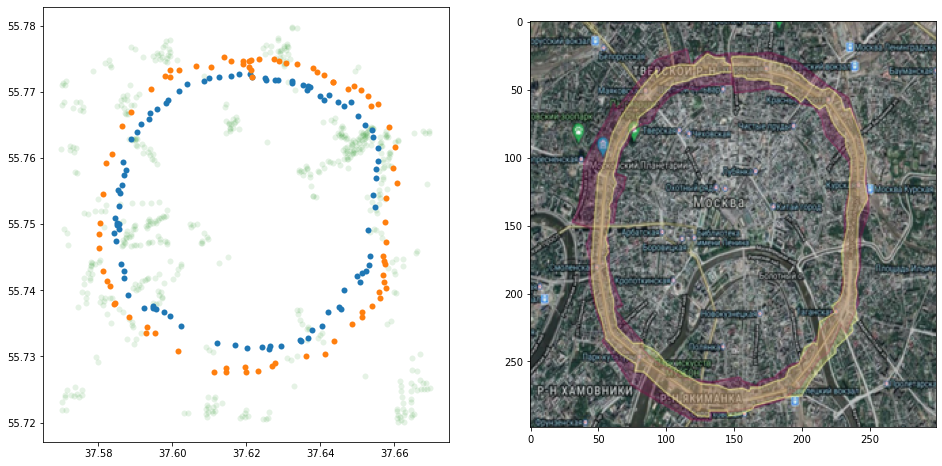

In [68]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

axes[0].scatter(subhouses[:, 0], subhouses[:, 1], linewidths=0.001, alpha=0.1, c="g")
axes[0].scatter(poly_1[:, 0], poly_1[:, 1], linewidths=0.005)
axes[0].scatter(poly_2[:, 0], poly_2[:, 1], linewidths=0.005)
#axes[0].set_ylim(55.72, 55.78)
#axes[0].set_xlim(37.57, 37.67)

axes[1].imshow(img)

plt.show()

In [69]:
def area(x1, y1, x2, y2, x3, y3): 
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1)  
                + x3 * (y1 - y2)) / 2.0) 

def isInside(x1, y1, x2, y2, x3, y3, x, y): 
    ABC = area (x1, y1, x2, y2, x3, y3) 
    PBC = area (x, y, x2, y2, x3, y3)  
    PAC = area (x1, y1, x, y, x3, y3)
    PAB = area (x1, y1, x2, y2, x, y) 

    return np.isclose(ABC, PBC + PAC + PAB)

def point_inside_poly(poly, point):
    x_min = np.min(poly[:, 0])
    x_max = np.max(poly[:, 0])
    y_min = np.min(poly[:, 1])
    y_max = np.max(poly[:, 1])
    if point[0] < x_min or point[0] > x_max or point[1] < y_min or point[1] > y_max:
        return False
    
    center = poly.mean(axis=0)
    res = False
    for a, b in zip(poly, np.concatenate([poly[1:], poly[:1]])):
        res = res or isInside(*center, *a, *b, *point)
    return res

In [70]:
inside_poly1 = np.array([point_inside_poly(poly_1, h) for h in subhouses])
inside_poly2 = np.array([point_inside_poly(poly_2, h) for h in subhouses])
between_polys = np.logical_xor(inside_poly1, inside_poly2)
print(np.sum(between_polys))

64


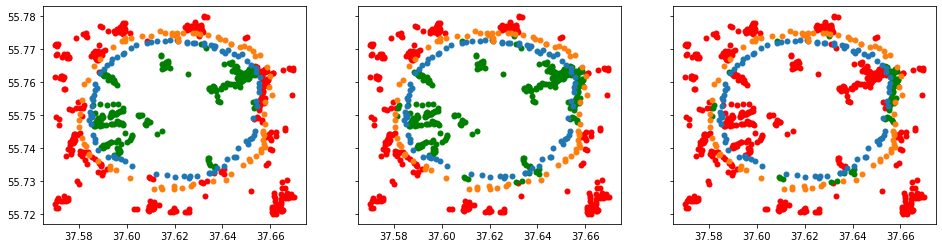

In [71]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharex=True, sharey=True)

axes[0].scatter(subhouses[~inside_poly1, 0], subhouses[~inside_poly1, 1], linewidths=0.001, alpha=1, c="r")
axes[0].scatter(subhouses[inside_poly1, 0], subhouses[inside_poly1, 1], linewidths=0.001, alpha=1, c="g")
axes[0].scatter(poly_1[:, 0], poly_1[:, 1], linewidths=0.005)
axes[0].scatter(poly_2[:, 0], poly_2[:, 1], linewidths=0.005)


axes[1].scatter(subhouses[~inside_poly2, 0], subhouses[~inside_poly2, 1], linewidths=0.001, alpha=1, c="r")
axes[1].scatter(subhouses[inside_poly2, 0], subhouses[inside_poly2, 1], linewidths=0.001, alpha=1, c="g")
axes[1].scatter(poly_1[:, 0], poly_1[:, 1], linewidths=0.005)
axes[1].scatter(poly_2[:, 0], poly_2[:, 1], linewidths=0.005)

axes[2].scatter(subhouses[~inside_poly2, 0], subhouses[~inside_poly2, 1], linewidths=0.001, alpha=1, c="r")
axes[2].scatter(subhouses[inside_poly1, 0], subhouses[inside_poly1, 1], linewidths=0.001, alpha=1, c="r")
axes[2].scatter(subhouses[between_polys, 0], subhouses[between_polys, 1], linewidths=0.001, alpha=1, c="g")
axes[2].scatter(poly_1[:, 0], poly_1[:, 1], linewidths=0.005)
axes[2].scatter(poly_2[:, 0], poly_2[:, 1], linewidths=0.005)

plt.show()

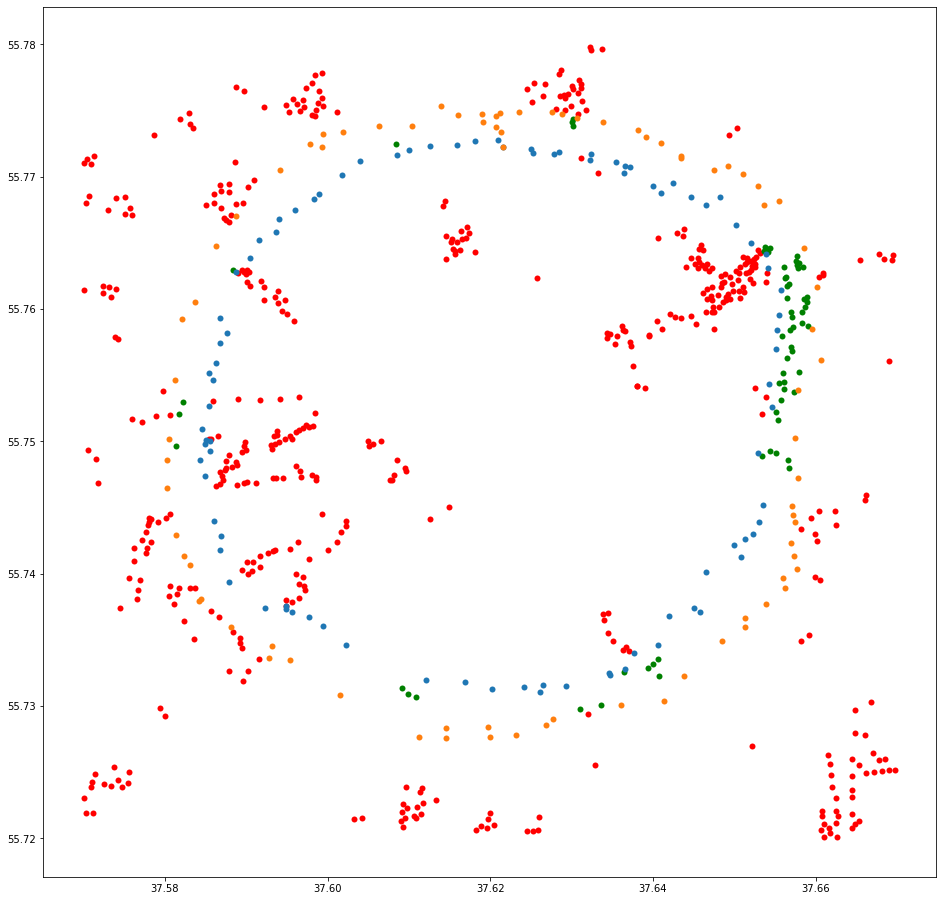

In [72]:
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 16), sharex=True, sharey=True)

axes = [1, 1, axes]

axes[2].scatter(subhouses[~inside_poly2, 0], subhouses[~inside_poly2, 1], linewidths=0.001, alpha=1, c="r")
axes[2].scatter(subhouses[inside_poly1, 0], subhouses[inside_poly1, 1], linewidths=0.001, alpha=1, c="r")
axes[2].scatter(subhouses[between_polys, 0], subhouses[between_polys, 1], linewidths=0.001, alpha=1, c="g")
axes[2].scatter(poly_1[:, 0], poly_1[:, 1], linewidths=0.005)
axes[2].scatter(poly_2[:, 0], poly_2[:, 1], linewidths=0.005)

plt.show()

## Проверим на всех всех домах (до джойна)

In [73]:
all_houses = coords_db[["coor_x", "coor_y"]][coords_db[["coor_x", "coor_y"]]!=0].dropna().values

In [74]:
all_houses.shape

(149052, 2)

149к домов - оставим только тех, кто неподалёку

In [75]:
all_subhouses = get_subhouses(all_houses)
all_subhouses.shape

(16735, 2)

Окей, в окрестности кольца 16к домов

In [76]:
n = poly_points.shape[0] // 2 + 6
poly_1 = poly_points[:n, :]
poly_2 = poly_points[n:, :]

inside_poly1 = np.array([point_inside_poly(poly_1, h) for h in all_subhouses])
inside_poly2 = np.array([point_inside_poly(poly_2, h) for h in all_subhouses])
between_polys = np.logical_xor(inside_poly1, inside_poly2)
print(np.sum(between_polys))

1795


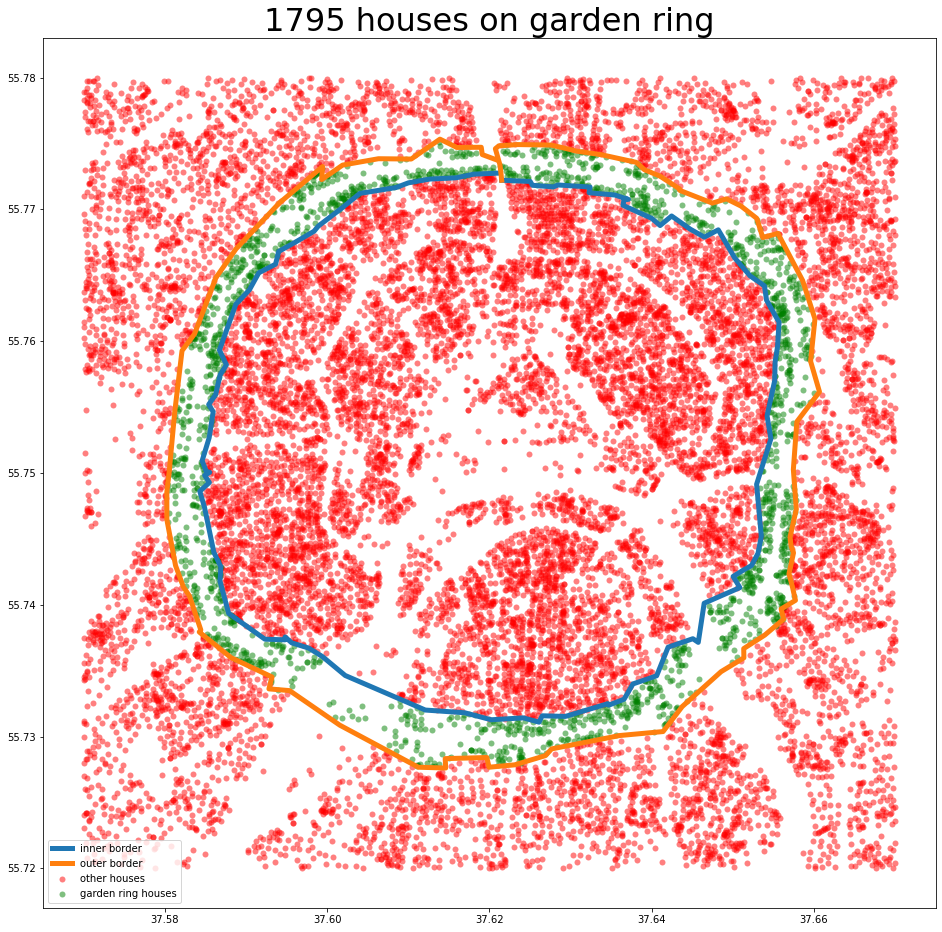

In [77]:
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 16), sharex=True, sharey=True)

axes = [1, 1, axes]

axes[2].set_title("{} houses on garden ring".format(np.sum(between_polys)), size=32)

axes[2].scatter(all_subhouses[~inside_poly2, 0], all_subhouses[~inside_poly2, 1], linewidths=0.0001, alpha=0.5, c="r")
axes[2].scatter(all_subhouses[inside_poly1, 0], all_subhouses[inside_poly1, 1], linewidths=0.0001, alpha=0.5, c="r", label="other houses")
axes[2].scatter(all_subhouses[between_polys, 0], all_subhouses[between_polys, 1], linewidths=0.0001, alpha=0.5, c="g", label="garden ring houses")
axes[2].plot(poly_1[:, 0], poly_1[:, 1], linewidth=5, label="inner border")
axes[2].plot(poly_2[:, 0], poly_2[:, 1], linewidth=5, label="outer border")
plt.legend()

plt.show()

## Ah shit here we go again

Зайдём с другого конца - берём coords_db, там оставляем только дома на садовом.

In [78]:
hz = coords_db[["coor_x", "coor_y"]].fillna(0).values

In [79]:
coords_db["inside_poly"] = [not point_inside_poly(poly_1, h) and point_inside_poly(poly_2, h) for h in hz]

In [80]:
coords_db

,ADDRESS,coor_x,coor_y,short_address,str,д,к,стр,сооруж,inside_poly
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249,варшавское ш д 150 стр 2,варшавское ш,150,None,2,None,False
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493,косинская ул д 26а,косинская ул,26а,None,None,None,False
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224,гороховский пер д 21,гороховский пер,21,None,None,None,False
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257,тагильская ул д 4 стр 36,тагильская ул,4,None,36,None,False
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510,ленинградский пркт д 73а стр 3,ленинградский пркт,73а,None,3,None,False
...,...,...,...,...,...,...,...,...,...,...
406908,"город Москва, внутригородская территория муниц...",0.000000,0.000000,внутригская территория муниципальный округ мар...,внутригская территория муниципальный округ мар...,None,25,None,None,False
406911,"город Москва, внутригородская территория муниц...",37.583656,55.741449,внутригская территория муниципальный округ хам...,внутригская территория муниципальный округ хам...,13а,None,None,None,True
406922,"город Москва, внутригородская территория муниц...",0.000000,0.000000,внутригская территория муниципальный округ баб...,внутригская территория муниципальный округ баб...,земельный,12,None,None,False
406925,"город Москва, внутригородская территория муниц...",37.639249,55.887125,внутригская территория муниципальный округ сев...,внутригская территория муниципальный округ сев...,2а,None,None,None,False


In [81]:
garden_houses_big = coords_db[coords_db["inside_poly"]]

In [82]:
garden_houses_big["short_address"] = garden_houses_big["short_address"].str.strip()

In [83]:
print(garden_houses_big.shape)
garden_houses_big.head(10)

(1795, 10)


,ADDRESS,coor_x,coor_y,short_address,str,д,к,стр,сооруж,inside_poly
229,"город Москва, Малая Бронная улица, дом 31/13",37.591410,55.765161,малая бронная ул д 31/13,малая бронная ул,31/13,None,None,None,True
378,"город Москва, Смоленская улица, дом 8",37.580392,55.746302,смоленская ул д 8,смоленская ул,8,None,None,None,True
412,"город Москва, улица Земляной Вал, дом 32",37.656927,55.757164,ул земляной вал д 32,ул земляной вал,32,None,None,None,True
424,"город Москва, Большая Серпуховская улица, дом ...",37.623838,55.728327,большая серпуховская ул д 12/11 стр 6,большая серпуховская ул,12/11,None,6,None,True
442,"город Москва, Большой Каретный переулок, дом 2...",37.617308,55.772600,большой каретный пер д 22 стр 2,большой каретный пер,22,None,2,None,True
461,"город Москва, Большой Дровяной переулок, дом 4...",37.655904,55.743685,большой дровяной пер д 4 стр 1,большой дровяной пер,4,None,1,None,True
572,"город Москва, Павелецкая площадь, дом 2, строе...",37.634797,55.730384,павелецкая пл д 2 стр 1,павелецкая пл,2,None,1,None,True
1064,"город Москва, Новинский бульвар, дом 18, корпус 2",37.585068,55.754096,новинский бр д 18 к 2,новинский бр,18,2,None,None,True
1073,"город Москва, Большая Садовая улица, дом 10",37.593531,55.767065,большая садовая ул д 10,большая садовая ул,10,None,None,None,True
1152,"город Москва, Новая Басманная улица, дом 2/1, ...",37.653337,55.768507,новая басманная ул д 2/1 стр 2,новая басманная ул,2/1,None,2,None,True


In [84]:
def clip_bad_prefix(s, prefix="внутригская территория муниципальный округ"):
    if prefix in s:
        return " ".join(s.split()[len(prefix.split()) + 1:])

    return s

s = "внутригская территория муниципальный округ замоскворечье 6й монетчиковский пер д 12"
print(clip_bad_prefix(s))

6й монетчиковский пер д 12


In [85]:
target_addr = garden_houses_big.short_address.apply(clip_bad_prefix).values
source_addr = db.short_address.apply(clip_bad_prefix).values

In [86]:
target_addr.shape, source_addr.shape

((1795,), (34433,))

In [87]:
def norm_address(x):
    return " ".join(sorted(x.split()))

In [88]:
A = set([norm_address(x) for x in target_addr])
B = set([norm_address(x) for x in source_addr])
C = [x for x in A if x in B]

In [89]:
len(C)

272

In [90]:
garden_houses_big["norm_address"] = garden_houses_big.short_address.apply(clip_bad_prefix).apply(norm_address)
db["norm_address"] = db.short_address.apply(clip_bad_prefix).apply(norm_address)

In [91]:
joined_db = pd.merge(
    garden_houses_big,
    db[[
        "address",
        "short_address",
        "norm_address",
        "living_quarters_count",
        "quarters_count",
        "entrance_count",
        "floor_count_min",
        "floor_count_max"]],
    how="inner",
    on = ["norm_address"],
    suffixes = ["_a", "_b"]
)

In [92]:
for_stats = joined_db
for_stats.loc[:, "groupby"] = "total"
for_stats.groupby("groupby").agg(
    {
         "address": ["count"],
         "living_quarters_count":["mean",  "sum"],
         "quarters_count" : ["sum"],
         "entrance_count": ["mean",  "sum"],
         "floor_count_min": ["min", "mean", "max"],
         "floor_count_max": ["min", "mean", "max"],
    })

address living_quarters_count          quarters_count entrance_count  \
          count                  mean      sum            sum           mean   
groupby                                                                        
total       272             57.471264  15000.0          16766       2.988764   

               floor_count_min                 floor_count_max                  
           sum             min      mean   max             min      mean   max  
groupby                                                                         
total    798.0             0.0  5.375479  17.0             2.0  6.846442  26.0

In [93]:
for x in A:
    if "смоленская" in x:
        print(x)

3 д пл смоленская
2 27 д пл смоленскаясенная стр
13/21 2 д пл смоленская стр
8 д пл смоленская
1а 27 д пл смоленскаясенная стр
27 7 д пл смоленскаясенная стр
8 д смоленская ул
6 д смоленская ул
28 д пл смоленскаясенная
3 32 д пл смоленскаясенная стр
30 4 д пл смоленскаясенная сооруж
2 3 д смоленская стр ул
23/25 3 д пл смоленскаясенная стр
2 30 д пл смоленскаясенная стр
2 3234/57/23 д пл смоленскаясенная стр
1 32 д пл смоленскаясенная стр
1 6 д пл смоленская стр
3 30 д пл смоленскаясенная стр
3234/57/23 4 д пл смоленскаясенная стр
1 13 д пл смоленская сооруж
1а 32 д пл смоленскаясенная сооруж
13/21 д пл смоленская
13/21/2 владение пл смоленская
1 27 д пл смоленскаясенная стр
3 6 д пл смоленская стр
11 2 д пл смоленская стр
6 д пл смоленская
5 д пл смоленская
30 д пл смоленскаясенная
27 6 д пл смоленскаясенная стр
3 д смоленская ул
23/25 д пл смоленскаясенная
27 3 д пл смоленскаясенная стр


for x in B:
    if "смоленская" in x:
        print(x)

In [95]:
joined_db.shape

(272, 19)

# Ещё раз - ебёмся с адресами

## Табличка с координатами:

In [106]:
garden_houses_big

,ADDRESS,coor_x,coor_y,short_address,str,д,к,стр,сооруж,inside_poly,norm_address
229,"город Москва, Малая Бронная улица, дом 31/13",37.591410,55.765161,малая бронная ул д 31/13,малая бронная ул,31/13,None,None,None,True,31/13 бронная д малая ул
378,"город Москва, Смоленская улица, дом 8",37.580392,55.746302,смоленская ул д 8,смоленская ул,8,None,None,None,True,8 д смоленская ул
412,"город Москва, улица Земляной Вал, дом 32",37.656927,55.757164,ул земляной вал д 32,ул земляной вал,32,None,None,None,True,32 вал д земляной ул
424,"город Москва, Большая Серпуховская улица, дом ...",37.623838,55.728327,большая серпуховская ул д 12/11 стр 6,большая серпуховская ул,12/11,None,6,None,True,12/11 6 большая д серпуховская стр ул
442,"город Москва, Большой Каретный переулок, дом 2...",37.617308,55.772600,большой каретный пер д 22 стр 2,большой каретный пер,22,None,2,None,True,2 22 большой д каретный пер стр
...,...,...,...,...,...,...,...,...,...,...,...
401921,"город Москва, внутригородская территория муниц...",37.653502,55.743367,внутригская территория муниципальный округ таг...,внутригская территория муниципальный округ таг...,76/21,None,2,None,True,2 76/21 вал д земляной стр ул
402863,"город Москва, внутригородская территория муниц...",37.639736,55.733652,внутригская территория муниципальный округ зам...,внутригская территория муниципальный округ зам...,None,7,None,None,True,7/5 земельный татарская ул участок
403360,"город Москва, внутригородская территория муниц...",37.649902,55.735630,внутригская территория муниципальный округ таг...,внутригская территория муниципальный округ таг...,1а,None,None,None,True,1а д краснохолмская наб
405424,"город Москва, внутригородская территория муниц...",37.639233,55.734226,внутригская территория муниципальный округ зам...,внутригская территория муниципальный округ зам...,None,5,None,None,True,5/5 земельный татарская ул участок


In [109]:
garden_houses_big["short_address_2"] = garden_houses_big["short_address"].apply(clip_bad_prefix)
garden_houses_big["str_2"] = garden_houses_big["str"].apply(clip_bad_prefix)

In [110]:
garden_houses_big

,ADDRESS,coor_x,coor_y,short_address,str,д,к,стр,сооруж,inside_poly,norm_address,short_address_2,str_2
229,"город Москва, Малая Бронная улица, дом 31/13",37.591410,55.765161,малая бронная ул д 31/13,малая бронная ул,31/13,None,None,None,True,31/13 бронная д малая ул,малая бронная ул д 31/13,малая бронная ул
378,"город Москва, Смоленская улица, дом 8",37.580392,55.746302,смоленская ул д 8,смоленская ул,8,None,None,None,True,8 д смоленская ул,смоленская ул д 8,смоленская ул
412,"город Москва, улица Земляной Вал, дом 32",37.656927,55.757164,ул земляной вал д 32,ул земляной вал,32,None,None,None,True,32 вал д земляной ул,ул земляной вал д 32,ул земляной вал
424,"город Москва, Большая Серпуховская улица, дом ...",37.623838,55.728327,большая серпуховская ул д 12/11 стр 6,большая серпуховская ул,12/11,None,6,None,True,12/11 6 большая д серпуховская стр ул,большая серпуховская ул д 12/11 стр 6,большая серпуховская ул
442,"город Москва, Большой Каретный переулок, дом 2...",37.617308,55.772600,большой каретный пер д 22 стр 2,большой каретный пер,22,None,2,None,True,2 22 большой д каретный пер стр,большой каретный пер д 22 стр 2,большой каретный пер
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401921,"город Москва, внутригородская территория муниц...",37.653502,55.743367,внутригская территория муниципальный округ таг...,внутригская территория муниципальный округ таг...,76/21,None,2,None,True,2 76/21 вал д земляной стр ул,ул земляной вал д 76/21 стр 2,ул земляной вал
402863,"город Москва, внутригородская территория муниц...",37.639736,55.733652,внутригская территория муниципальный округ зам...,внутригская территория муниципальный округ зам...,None,7,None,None,True,7/5 земельный татарская ул участок,татарская ул земельный участок 7/5,татарская ул земельный участо 5
403360,"город Москва, внутригородская территория муниц...",37.649902,55.735630,внутригская территория муниципальный округ таг...,внутригская территория муниципальный округ таг...,1а,None,None,None,True,1а д краснохолмская наб,краснохолмская наб д 1а,краснохолмская наб
405424,"город Москва, внутригородская территория муниц...",37.639233,55.734226,внутригская территория муниципальный округ зам...,внутригская территория муниципальный округ зам...,None,5,None,None,True,5/5 земельный татарская ул участок,татарская ул земельный участок 5/5,татарская ул земельный участо 5


In [131]:
entrance_db = db[["address", "short_address", "str", "д", "к", "стр", "сооруж", "norm_address", "entrance_count"]]

In [119]:
garden_houses_big

,ADDRESS,coor_x,coor_y,short_address,str,д,к,стр,сооруж,inside_poly,norm_address,short_address_2,str_2
229,"город Москва, Малая Бронная улица, дом 31/13",37.591410,55.765161,малая бронная ул д 31/13,малая бронная ул,31/13,None,None,None,True,31/13 бронная д малая ул,малая бронная ул д 31/13,малая бронная ул
378,"город Москва, Смоленская улица, дом 8",37.580392,55.746302,смоленская ул д 8,смоленская ул,8,None,None,None,True,8 д смоленская ул,смоленская ул д 8,смоленская ул
412,"город Москва, улица Земляной Вал, дом 32",37.656927,55.757164,ул земляной вал д 32,ул земляной вал,32,None,None,None,True,32 вал д земляной ул,ул земляной вал д 32,ул земляной вал
424,"город Москва, Большая Серпуховская улица, дом ...",37.623838,55.728327,большая серпуховская ул д 12/11 стр 6,большая серпуховская ул,12/11,None,6,None,True,12/11 6 большая д серпуховская стр ул,большая серпуховская ул д 12/11 стр 6,большая серпуховская ул
442,"город Москва, Большой Каретный переулок, дом 2...",37.617308,55.772600,большой каретный пер д 22 стр 2,большой каретный пер,22,None,2,None,True,2 22 большой д каретный пер стр,большой каретный пер д 22 стр 2,большой каретный пер
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401921,"город Москва, внутригородская территория муниц...",37.653502,55.743367,внутригская территория муниципальный округ таг...,внутригская территория муниципальный округ таг...,76/21,None,2,None,True,2 76/21 вал д земляной стр ул,ул земляной вал д 76/21 стр 2,ул земляной вал
402863,"город Москва, внутригородская территория муниц...",37.639736,55.733652,внутригская территория муниципальный округ зам...,внутригская территория муниципальный округ зам...,None,7,None,None,True,7/5 земельный татарская ул участок,татарская ул земельный участок 7/5,татарская ул земельный участо 5
403360,"город Москва, внутригородская территория муниц...",37.649902,55.735630,внутригская территория муниципальный округ таг...,внутригская территория муниципальный округ таг...,1а,None,None,None,True,1а д краснохолмская наб,краснохолмская наб д 1а,краснохолмская наб
405424,"город Москва, внутригородская территория муниц...",37.639233,55.734226,внутригская территория муниципальный округ зам...,внутригская территория муниципальный округ зам...,None,5,None,None,True,5/5 земельный татарская ул участок,татарская ул земельный участок 5/5,татарская ул земельный участо 5


In [124]:
garden_1795_db = garden_houses_big[["ADDRESS", "short_address_2", "str", "д", "к", "стр", "сооруж", "norm_address"]]
garden_1795_db = garden_1795_db.rename(columns={"ADDRESS": "address", "short_address_2" : "short_address" })

In [125]:
garden_1795_db

,address,short_address,str,д,к,стр,сооруж,norm_address
229,"город Москва, Малая Бронная улица, дом 31/13",малая бронная ул д 31/13,малая бронная ул,31/13,None,None,None,31/13 бронная д малая ул
378,"город Москва, Смоленская улица, дом 8",смоленская ул д 8,смоленская ул,8,None,None,None,8 д смоленская ул
412,"город Москва, улица Земляной Вал, дом 32",ул земляной вал д 32,ул земляной вал,32,None,None,None,32 вал д земляной ул
424,"город Москва, Большая Серпуховская улица, дом ...",большая серпуховская ул д 12/11 стр 6,большая серпуховская ул,12/11,None,6,None,12/11 6 большая д серпуховская стр ул
442,"город Москва, Большой Каретный переулок, дом 2...",большой каретный пер д 22 стр 2,большой каретный пер,22,None,2,None,2 22 большой д каретный пер стр
...,...,...,...,...,...,...,...,...
401921,"город Москва, внутригородская территория муниц...",ул земляной вал д 76/21 стр 2,внутригская территория муниципальный округ таг...,76/21,None,2,None,2 76/21 вал д земляной стр ул
402863,"город Москва, внутригородская территория муниц...",татарская ул земельный участок 7/5,внутригская территория муниципальный округ зам...,None,7,None,None,7/5 земельный татарская ул участок
403360,"город Москва, внутригородская территория муниц...",краснохолмская наб д 1а,внутригская территория муниципальный округ таг...,1а,None,None,None,1а д краснохолмская наб
405424,"город Москва, внутригородская территория муниц...",татарская ул земельный участок 5/5,внутригская территория муниципальный округ зам...,None,5,None,None,5/5 земельный татарская ул участок


In [130]:
entrance_db.shape

(10, 9)

In [132]:
entrance_db[entrance_db.short_address.str.contains("каретный")]

,address,short_address,str,д,к,стр,сооруж,norm_address,entrance_count
11310,"г. Москва, пер. Каретный Б., д. 4, стр. 7",пер каретный б д 4 стр 7,пер каретный б,4,None,7,None,4 7 б д каретный пер стр,1.0
11311,"г. Москва, пер. Каретный Б., д. 6",пер каретный б д 6,пер каретный б,6,None,None,None,6 б д каретный пер,1.0
11312,"г. Москва, пер. Каретный Б., д. 15",пер каретный б д 15,пер каретный б,15,None,None,None,15 б д каретный пер,1.0
11313,"г. Москва, пер. Каретный Б., д. 17, стр. 1",пер каретный б д 17 стр 1,пер каретный б,17,None,1,None,1 17 б д каретный пер стр,2.0
11314,"г. Москва, пер. Каретный Б., д. 17, стр. 2",пер каретный б д 17 стр 2,пер каретный б,17,None,2,None,17 2 б д каретный пер стр,3.0
11315,"г. Москва, пер. Каретный Б., д. 17, стр. 3",пер каретный б д 17 стр 3,пер каретный б,17,None,3,None,17 3 б д каретный пер стр,2.0
11316,"г. Москва, пер. Каретный Б., д. 18, к. 1",пер каретный б д 18 к 1,пер каретный б,18,1,None,None,1 18 б д к каретный пер,1.0
11317,"г. Москва, пер. Каретный Б., д. 18, стр. 4",пер каретный б д 18 стр 4,пер каретный б,18,None,4,None,18 4 б д каретный пер стр,2.0
11318,"г. Москва, пер. Каретный Б., д. 20, стр. 1",пер каретный б д 20 стр 1,пер каретный б,20,None,1,None,1 20 б д каретный пер стр,1.0
11319,"г. Москва, пер. Каретный М., д. 5",пер каретный м д 5,пер каретный м,5,None,None,None,5 д каретный м пер,1.0


In [139]:
shortenings = [
    ("город", "г"),
    ("проспект", "пркт"),
    ("улица", "ул"),
    ("бульвар", "бр"),
    ("переулок", "пер"),
    ("проезд", "проезд"),
    ("шоссе", "ш"),
    ("площадь", "пл"),
    ("набережная", "наб"),
    ("дом", "д"),
    ("корпус", "к"),
    ("строение", "стр"),
    ("сооружение", "сооруж"),
    # add
    ("большой", "б"),
    ("большая", "б"),
    ("средний", "ср"),
    ("средняя", "ср"),
    ("малый", "м"),
    ("малая", "б")
]

In [138]:
garden_1795_db["address"] = garden_1795_db["address"].apply(shorten_address)
garden_1795_db["norm_address"] = garden_1795_db["address"].apply(norm_address)

In [143]:
shorts_1795 = set(garden_1795_db["short_address"].values)
norms_1795 = set(garden_1795_db["norm_address"].values)

shorts_entr = set(entrance_db["short_address"].values) 
norms_entr = set(entrance_db["norm_address"].values) 

In [144]:
shorts_intersect =  [x for x in shorts_1795 if x in shorts_entr]
norms_intersect = [x for x in norms_1795 if x in norms_entr]

In [145]:
len(shorts_intersect), len(norms_intersect)

(64, 298)